# Reload changes from files

In [152]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import from files

In [153]:
import numpy as np
import matplotlib.pyplot as plt


from BFS import BFS
from GenerateGrid import generate_grid
from Time import now, elapsed, current_time_hms
from SaveGraph import save_graph_list_to_file, SAVE_RESULTS

# Turn on/off saving the grids/results

In [154]:
SAVE_RESULTS = False

In [155]:
SAVE_RESULTS = True

# Make random grid and positions

In [156]:
def show_pos_in_grid(grid, start_pos, goal_pos):
    display_grid = np.array(grid, copy=True)
    x, y, _ = start_pos
    display_grid[y][x] = 8  # Mark the start position with an 8
    x, y = goal_pos
    display_grid[y][x] = 9  # Mark the goal position with a 9
    return display_grid

grid, start_pos, goal_pos = generate_grid(10, 10, wall_num=10)
print(grid)
print("Start position:", start_pos)
print("Goal position:", goal_pos)
print(show_pos_in_grid(grid, start_pos, goal_pos))

"""
wall_collision_directions = [
    (0, -1),  # North
    (0, 0),   # Center
    (-1, -1), # North-West
    (-1, 0)   # West
]
"""

[[0 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Start position: (3, 5, 3)
Goal position: (6, 0)
[[0 0 0 0 1 0 9 0 1 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


'\nwall_collision_directions = [\n    (0, -1),  # North\n    (0, 0),   # Center\n    (-1, -1), # North-West\n    (-1, 0)   # West\n]\n'

# Test BFS

In [157]:
"""
advance_directions = {
    0: (0, -1),  # North
    1: (1, 0),   # East
    2: (0, 1),   # South
    3: (-1, 0)   # West
}
"""

result = BFS(grid, start_pos, goal_pos)
if result:
    path = result
    print("Path found:", path[1:])
    print("Number of explored nodes:", path[0])
else:
    print("No path found")

Path found: ['D', 'D', 'a3', 'G', 'a1', 'a1', 'a3']
Number of explored nodes: 7


# Generate test grids

In [158]:
def generate_test_grid(size=10, wall_num=10, n=10):
    """
    Generate multiple test grids with specified size and wall percentage.
    Args:
        size (int): Size of the grid (size x size).
        wall_num (int): Number of walls in the grid.
        n (int): Number of grids to generate.
    """
    grids = []
    for _ in range(n):
        grid, start_pos, goal_pos = generate_grid(M=size, N=size, wall_num=wall_num)
        grids.append((grid, start_pos, goal_pos))
    return grids


def test_BFS_on_multiple_grids(size=10, wall_num=10, n=10, output_time=""):
    """
    Test BFS algorithm on multiple generated grids.
    """
    if output_time == "":
        output_time = current_time_hms()
    graphs = []
    results = []
    counter = 0
    while counter < n: # we don't count unsolvable grids
        test_grid, start_pos, goal_pos = generate_test_grid(size, wall_num, 1)[0]

        start = now()
        result = BFS(test_grid, start_pos, goal_pos)

        if result is None:
            continue

        results.append((elapsed(start), result))
        
        graphs.append((test_grid, start_pos, goal_pos))
        counter += 1

    save_graph_list_to_file(graphs, f"saved_graphs/{output_time}/")
    return results



# Test by size

In [159]:
def test_by_size():
    output_time = current_time_hms()
    for i in range(10, 51, 10):
        results = test_BFS_on_multiple_grids(size=i, wall_num=10, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)

        #print(f"Results: {results}")
        print(f"Average time for BFS on {len(results)} grids of size {i}x{i} with {i} walls: {avg_time:.6f} seconds.")

test_by_size()


Average time for BFS on 10 grids of size 10x10 with 10 walls: 0.001933 seconds.
Average time for BFS on 10 grids of size 20x20 with 20 walls: 0.010307 seconds.
Average time for BFS on 10 grids of size 30x30 with 30 walls: 0.037069 seconds.
Average time for BFS on 10 grids of size 40x40 with 40 walls: 0.046897 seconds.
Average time for BFS on 10 grids of size 50x50 with 50 walls: 0.130489 seconds.


# Mettre les resultats dans un plot

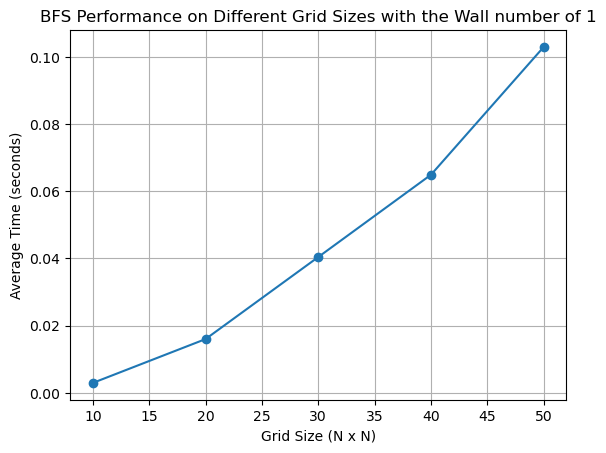

In [ ]:
def plot_performance_for_size():

    sizes = list(range(10, 51, 10))
    times = []
    output_time = current_time_hms()
    for i in sizes:
        results = test_BFS_on_multiple_grids(size=i, wall_num=i, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)
        times.append(avg_time)

    plt.plot(sizes, times, marker='o')
    plt.title('BFS Performance on Different Grid Sizes with the Wall Number Same as Size')
    plt.xlabel('Grid Size (N x N)')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)
    plt.show()

plot_performance_for_size()

# Test by wall number

In [161]:
def test_by_wall_number(size=20):
    output_time = current_time_hms()
    for i in range(10, 51, 10):
        results = test_BFS_on_multiple_grids(size=size, wall_num=i, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)

        #print(f"Results: {results}")
        print(f"Average time for BFS on {len(results)} grids of size {size}x{size} with {i} walls: {avg_time:.6f} seconds.")
test_by_wall_number()


Average time for BFS on 10 grids of size 20x20 with 10 walls: 0.010898 seconds.
Average time for BFS on 10 grids of size 20x20 with 20 walls: 0.012785 seconds.
Average time for BFS on 10 grids of size 20x20 with 30 walls: 0.018400 seconds.
Average time for BFS on 10 grids of size 20x20 with 40 walls: 0.011967 seconds.
Average time for BFS on 10 grids of size 20x20 with 50 walls: 0.010366 seconds.


# Mettre les resultats dans un plot

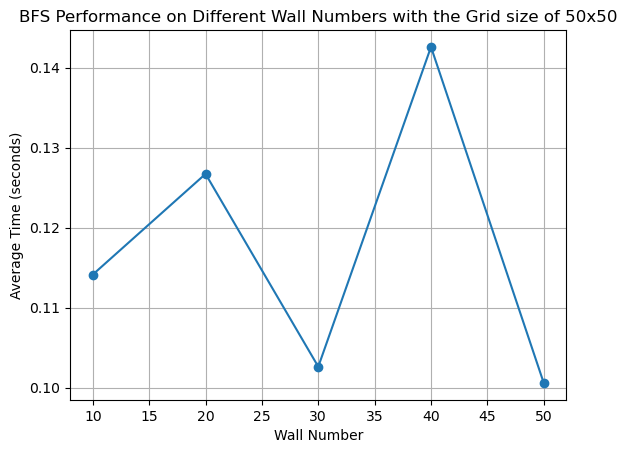

In [162]:
def plot_performance_for_wall_number(size=20):

    wall_numbers = list(range(10, 51, 10))
    times = []
    output_time = current_time_hms()
    for i in wall_numbers:
        results = test_BFS_on_multiple_grids(size=size, wall_num=i, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)
        times.append(avg_time)

    plt.plot(wall_numbers, times, marker='o')
    plt.title('BFS Performance on Different Wall Numbers with the Grid size of ' + str(size) + 'x' + str(size))
    plt.xlabel('Wall Number')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)
    plt.show()

plot_performance_for_wall_number(50)